<a href="https://colab.research.google.com/github/brainmentorspvtltd/IGDTU_ImageProcessingTF/blob/main/SimpleANN_UsingTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Toy dataset
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [6]:
data, target = make_circles(n_samples=1000, noise=0.03)

In [7]:
data[:5]

array([[-0.67749026, -0.65483637],
       [ 0.83458409,  0.47637717],
       [-0.45206319,  0.95777372],
       [ 0.77434442,  0.33403635],
       [ 0.09001656,  0.95188198]])

In [8]:
target[:5]

array([0, 0, 0, 1, 0])

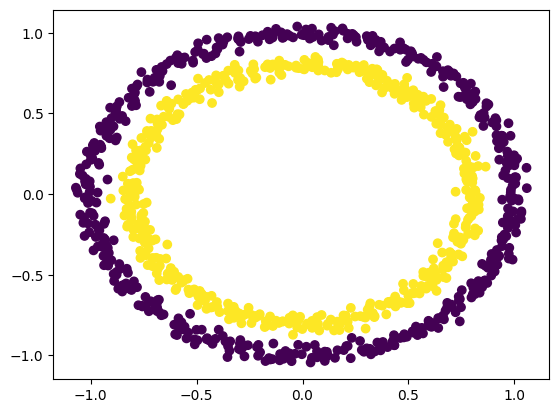

In [9]:
plt.scatter(data[:,0], data[:,1], c=target)
plt.show()

In [76]:
model = Sequential([
    Input(shape=[2]),  # Input Layer
    #Dense(2),
    Dense(4, activation="relu"), # Hidden Layer with 4 neurons
    Dense(4, activation="relu"), # Hidden Layer with 4 neurons
    Dense(1, activation="sigmoid")  # Output Layer with 1 neuron
])

In [77]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 12        
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [78]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

In [79]:
x_train.shape

(750, 2)

In [80]:
x_test.shape

(250, 2)

In [81]:
# because our problem is binary classification so we will use BinaryCrossEntropy
loss = tf.keras.losses.BinaryCrossentropy()
# for optimization we are using Stochastic gradient descent
# optimizer = tf.keras.optimizers.SGD()
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
24/24 [==============================] - 1s 7ms/step - loss: 0.6849 - accuracy: 0.5160 - val_loss: 0.7029 - val_accuracy: 0.4560
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5240 - val_loss: 0.7002 - val_accuracy: 0.4680
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5307 - val_loss: 0.6969 - val_accuracy: 0.4600
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5253 - val_loss: 0.6949 - val_accuracy: 0.4760
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5293 - val_loss: 0.6938 - val_accuracy: 0.4840
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5320 - val_loss: 0.6925 - val_accuracy: 0.4960
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5280 - val_loss: 0.6915 - val_accuracy: 0.4960
Epoch 8/100
2

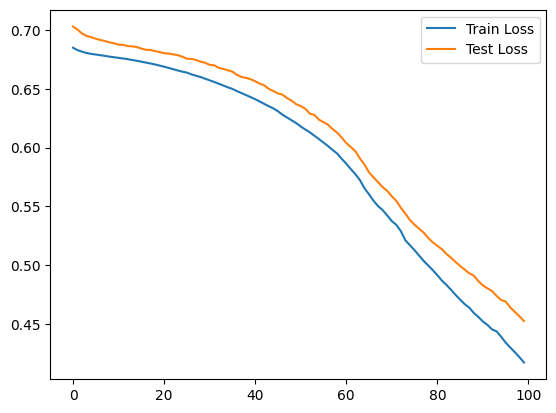

In [82]:
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Test Loss")
plt.legend()
plt.show()

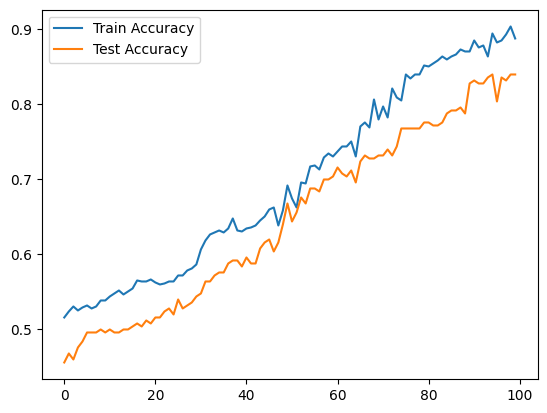

In [83]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Test Accuracy")
plt.legend()
plt.show()

In [84]:
y_pred = model.predict(x_test)

8/8 [==============================] - 0s 1ms/step


In [85]:
y_pred = np.round(y_pred)

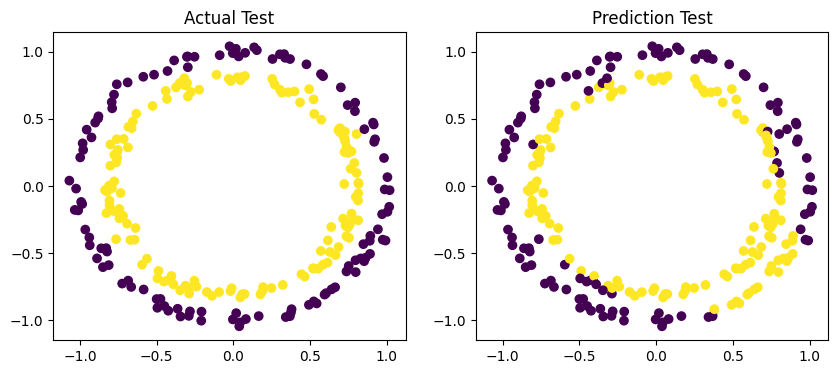

In [88]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Actual Test")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test)
plt.subplot(1,2,2)
plt.title("Prediction Test")
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred)
plt.show()